In [2]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [5]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6525 - accuracy: 0.8320 - val_loss: 0.3617 - val_accuracy: 0.9029
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3401 - accuracy: 0.9052 - val_loss: 0.2942 - val_accuracy: 0.9175
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2898 - accuracy: 0.9186 - val_loss: 0.2645 - val_accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2585 - accuracy: 0.9272 - val_loss: 0.2392 - val_accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2347 - accuracy: 0.9339 - val_loss: 0.2207 - val_accuracy: 0.9369
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2160 - accuracy: 0.9395 - val_loss: 0.2055 - val_accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2003 - accuracy: 0.9437 - val_loss: 0.1932 - val_accuracy:

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%3.f" %test_loss)
print("Accuracy=%3.f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1626 - accuracy: 0.9521
loss=  0
Accuracy=  1


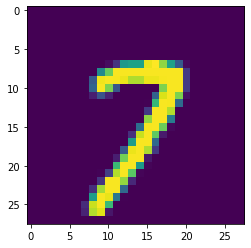

313/313 [==============================] - 2s 4ms/step


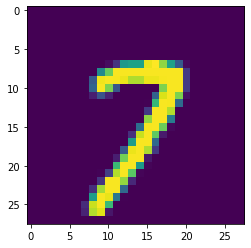

Predicted value: [1.3460939e-06 3.1209604e-06 1.5327202e-04 7.1138151e-05 8.0251021e-07
 9.9623446e-07 6.4228001e-09 9.9745625e-01 3.9706101e-06 2.3090914e-03]


In [9]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('Predicted value:',predicted_value[n])

In [11]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

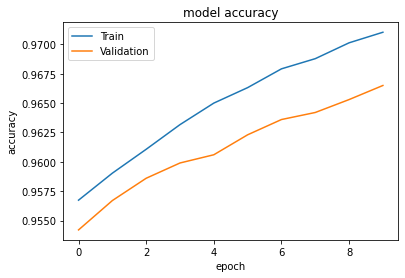

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

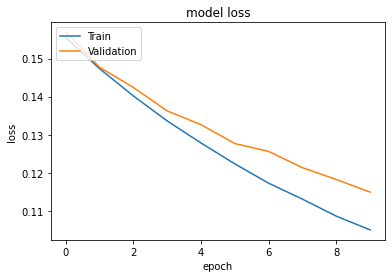

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'],loc="upper left")
plt.show()